# Problem 1: EU Cities Temperatures

In [3]:
import math
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
from numpy import nan as NA
import csv
from matplotlib import pyplot as plt
f = open("data/EuCitiesTemperatures.csv")
data = pd.read_csv(f)

### Preprocessing

#### 1. Fill in the missing latitude and longitude values by calcu- lating the average for that country. Round the average to 2 decimal places.

In [4]:
def missing_values(data):
    lst=Series(list(data['latitude']), index=data['country'].values)
    newlatlist=[]
    for i in data.index:
        if math.isnan(data['latitude'][i]):
            newlatlist.append(round(np.nanmean(np.array(lst[data['country'][i]])),2))
        else:
            newlatlist.append(data['latitude'][i])
    data['latitude']=newlatlist
    lst1=Series(list(data['longitude']), index=data['country'].values)
    newlonglist=[]
    for i in data.index:
        if math.isnan(data['longitude'][i]):
            newlonglist.append(round(np.nanmean(np.array(lst1[data['country'][i]])),2))
        else:
            newlonglist.append(data['longitude'][i])
    data['longitude']=newlonglist
    data.to_csv("EuCitiesTemperatures.csv", columns=data.columns)

In [9]:
missing_values(data)

In [10]:
data

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


#### 2. Find the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximal number of cities in this geographical band. (More than one country could have the maximal number of values.)

In [5]:
def subset(data):
    cities=[]
    countries=list(data['country'].values)
    countries1=list()
    for i in data.index:
        if data['latitude'][i]>=40 and data['latitude'][i]<=60 and data['longitude'][i]>=15 and data['longitude'][i]<=30:
            cities.append(data['city'][i])
        else:
            countries1.append(countries[i])
            countries[i]=0
    lst = [i for i in countries if i != 0]
    maximalc=list()
    for i in lst:
        if i not in countries1:
            if i not in maximalc:
                maximalc.append(i)
    return cities, maximalc #list of cities that lie between latitudes 40 to 60 and longitudes 15 to 30, and a list countries have the maximal number of cities in this geographical band


In [11]:
subset(data)

(['Elbasan',
  'Vienna',
  'Minsk',
  'Orsha',
  'Pinsk',
  'Brest',
  'Hrodna',
  'Mazyr',
  'Plovdiv',
  'Burgas',
  'Pleven',
  'Ruse',
  'Stara Zagora',
  'Split',
  'Brno',
  'Ostrava',
  'Tartu',
  'Tallinn',
  'Budapest',
  'Debrecen',
  'Gyor',
  'Szeged',
  'Bari',
  'Foggia',
  'Daugavpils',
  'Riga',
  'Klaipeda',
  'Kaunas',
  'Vilnius',
  'Skopje',
  'Balti',
  'Chisinau',
  'Podgorica',
  'Bialystok',
  'Bydgoszcz',
  'Bytom',
  'Elblag',
  'Kielce',
  'Koszalin',
  'Poznan',
  'Wroclaw',
  'Warsaw',
  'Botosani',
  'Braila',
  'Bucharest',
  'Craiova',
  'Sibiu',
  'Arad',
  'Bacau',
  'Baia Mare',
  'Constanta',
  'Belgrade',
  'Nis',
  'Novi Sad',
  'Bratislava',
  'Kosice',
  'MalmÃƒÂ¶',
  'Uppsala',
  'Bursa',
  'Edirne',
  'Tekirdag',
  'Chernivtsi',
  'Rivne'],
 ['Albania',
  'Belarus',
  'Bulgaria',
  'Estonia',
  'Hungary',
  'Latvia',
  'Lithuania',
  'Macedonia',
  'Moldova',
  'Montenegro',
  'Poland',
  'Romania',
  'Serbia',
  'Slovakia'])

#### 3. Fill in the missing temperature values by the average tem- perature value of the similar region type. A region type would be a combinaton of whether it is in EU and whether it has a coastline.

In [12]:
def average_temp(data):
    eu=[] #eu only
    euc=[] #eu and coast
    c=[] #coast only
    n=[] #neither
    for i in data.index:
        if data['coastline'][i]=='yes' and data['EU'][i]=='no':
            c.append(data['temperature'][i])
        elif data['EU'][i]=='yes' and data['coastline'][i]=='no':
            eu.append(data['temperature'][i])
        elif data['coastline'][i]=='yes' and data['EU'][i]=='yes':
            euc.append(data['temperature'][i])
        elif data['coastline'][i]=='no' and data['EU'][i]=='no':
            n.append(data['temperature'][i])
    for i in data.index:
        if math.isnan(data['temperature'][i]):
            if data['coastline'][i]=='yes' and data['EU'][i]=='no':
                data['temperature'][i]=round(np.nanmean(np.array(c)),2)
            elif data['EU'][i]=='yes' and data['coastline'][i]=='no':
                data['temperature'][i]=round(np.nanmean(np.array(eu)),2)
            elif data['coastline'][i]=='yes' and data['EU'][i]=='yes':
                data['temperature'][i]=round(np.nanmean(np.array(euc)),2)
            elif data['coastline'][i]=='no' and data['EU'][i]=='no':
                data['temperature'][i]=round(np.nanmean(np.array(n)),2)
    data.to_csv("EuCitiesTemperatures.csv", columns=data.columns)
average_temp(data)

In [13]:
average_temp(data)

In [14]:
data

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


### Visualization

#### 1. Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

In [15]:
def showregions(data):
    regions=['Coast','EU','EU and coast','Neither']
    ceu=0 #counter eu only
    ceuc=0 #counter eu and coast
    cc=0 #counter coast only
    cn=0 #counter neither
    for i in data.index:
        if data['coastline'][i]=='yes' and data['EU'][i]=='no':
             cc+=1
        elif data['EU'][i]=='yes' and data['coastline'][i]=='no':
             ceu+=1
        elif data['coastline'][i]=='yes' and data['EU'][i]=='yes':
             ceuc+=1
        elif data['coastline'][i]=='no' and data['EU'][i]=='no':
            cn+=1
    cities=[cc,ceu,ceuc,cn]
    plt.bar(regions,cities)
    plt.show()

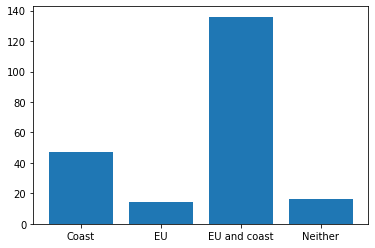

In [16]:
showregions(data)

#### 2. Plot a scatter plot of latitude (y-axis) vs. longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

In [17]:
def eumap(data):
    countries=data.groupby('country')
    for name, group in countries:
        plt.plot(group.longitude, group.latitude, marker='o', linestyle='', markersize=5, label=name)

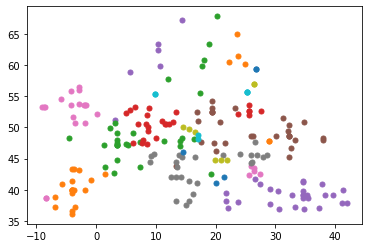

In [19]:
eumap(data)

#### 3. The population column contains values unique to each coun- try. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

In [20]:
def pophist(data):
    countriespop=Series(data['population'].values, index=list(data['country']))
    countriespop = (countriespop.reset_index().drop_duplicates(subset='index', keep='last').set_index('index').sort_index())
    countriespop.hist(bins=5)

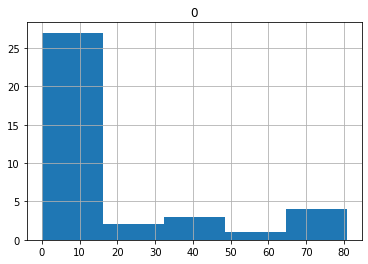

In [21]:
pophist(data)

#### 4. Create subplots in a 2 × 2 grid, with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

In [22]:
def subplots(data):
    fig, axes=plt.subplots(2,2,figsize=(30,30))
    ceu=0 #counter eu only
    ceuc=0 #counter eu and coast
    cc=0 #counter coast only
    cn=0 #counter neither
    for i in data.index:
        if data['coastline'][i]=='yes' and data['EU'][i]=='no':
            if data['temperature'][i]>10:
                color='red'
            elif data['temperature'][i]<6:
                color='blue'
            else:
                color='orange'
            axes[0][0].plot(data['city'][i],data['latitude'][i], 'o', c=color)
            cc+=1
        elif data['EU'][i]=='yes' and data['coastline'][i]=='no':
            if data['temperature'][i]>10:
                color='red'
            elif data['temperature'][i]<6:
                color='blue'
            else:
                color='orange'
            axes[0][1].plot(data['city'][i],data['latitude'][i], 'o', c=color)
            ceu+=1
        elif data['coastline'][i]=='yes' and data['EU'][i]=='yes':
            if data['temperature'][i]>10:
                color='red'
            elif data['temperature'][i]<6:
                color='blue'
            else:
                color='orange'
            axes[1][0].plot(data['city'][i],data['latitude'][i], 'o', c=color)
            ceuc+=1
        elif data['coastline'][i]=='no' and data['EU'][i]=='no':
            if data['temperature'][i]>10:
                color='red'
            elif data['temperature'][i]<6:
                color='blue'
            else:
                color='orange'
            axes[1][1].plot(data['city'][i],data['latitude'][i], 'o', c=color)
            cn+=1
    axes[0][0].set_title('Coastline only')
    axes[0][1].set_title('EU only')
    axes[1][0].set_title('Coastline and EU')
    axes[1][1].set_title('Neither')
    axes[0][0].set_xticks(range(cc))
    axes[0][1].set_xticks(range(ceu))
    axes[1][0].set_xticks(range(ceuc))
    axes[1][1].set_xticks(range(cn))
    axes[0][0].set_xticklabels(range(cc))
    axes[0][1].set_xticklabels(range(ceu))
    axes[1][0].set_xticklabels(range(ceuc))
    axes[1][1].set_xticklabels(range(cn))
    plt.show()

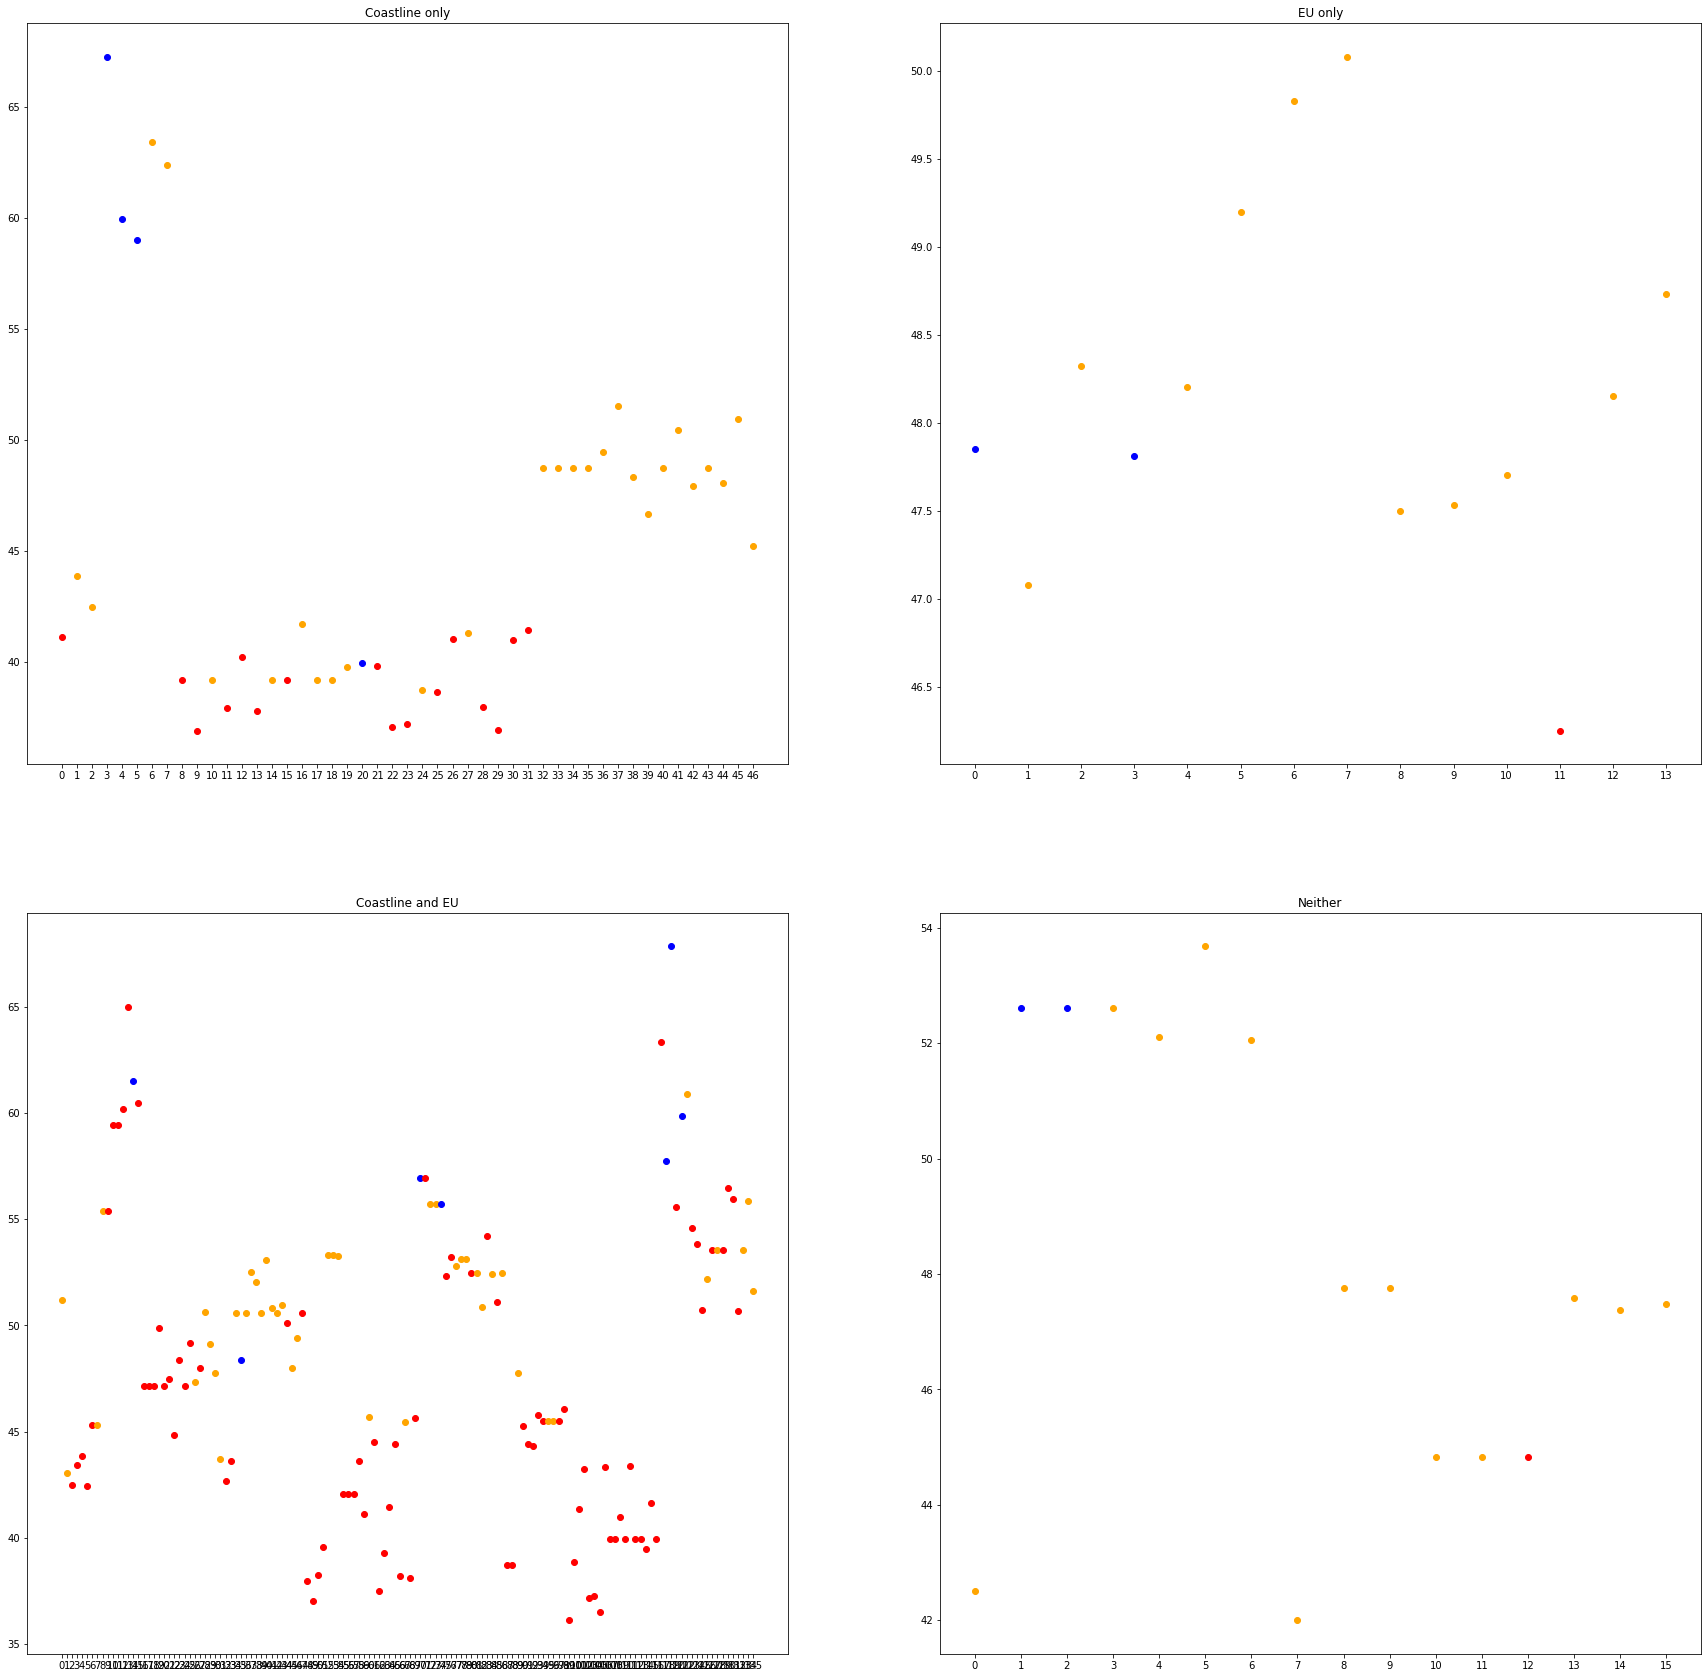

In [23]:
subplots(data)